<a href="https://colab.research.google.com/github/cs167/notebook-6-niclacey/blob/main/Notebook6_Nicole%20Lacey.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Notebook \# 6
Name:
Date:

## Problem Description:



### Hints/ Tips Tricks
- Don't forget to enable GPUs under 'Edit', 'Notebook Settings', 'Accerlate Hardware', 'GPU'.
- Make sure you unzip the data and put it in your Drive.


In [16]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import keras
import tensorflow 
import sys
from matplotlib import pyplot
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from tensorflow.keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator
import sys

## Connect to Drive
from google.colab import drive
import pandas
drive.mount('/content/drive')

## Image dimensions
img_width = 200
img_height = 200

## Directories for testing and training data
train_data_dir = '/content/drive/MyDrive/Datasets/chest_xray/train' 
test_data_dir = '/content/drive/MyDrive/Datasets/chest_xray/test'

## To feed the training images to the neural network in batches of 32 images at a time
batch_size = 32

## Rescale pixel values from [0, 255] to between 0 and 1
datagen = ImageDataGenerator(rescale=1.0/255.0)

## Look for training and testing data and figure out the class of each example based on subfolder
train_data = datagen.flow_from_directory(
        train_data_dir,
        target_size=(img_width, img_height),
        batch_size=batch_size,
        class_mode='binary')

test_data = datagen.flow_from_directory(
        test_data_dir,
        target_size=(img_width, img_height),
        batch_size=batch_size,
        class_mode='binary')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [19]:
# Build your CNN here
import warnings
warnings.filterwarnings('ignore')

model2 = Sequential()
model2.add(Conv2D(32, (3, 3), activation = 'relu', input_shape=(img_width, img_height, 3)))
model2.add(MaxPooling2D(pool_size=(2, 2)))

model2.add(Conv2D(32, (3, 3),activation = 'relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))

model2.add(Flatten())
model2.add(Dense(64,activation = 'relu'))
model2.add(Dense(1,activation='sigmoid'))

# need to compile the model before you can use it
opt = SGD(lr=0.001, momentum=0.9)
model2.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

In [20]:
training_results1 = model2.fit_generator(
        train_data, #training set
        steps_per_epoch = len(train_data), 
        epochs=3, #number of epochs 
        validation_data = test_data, #testing set
        validation_steps = len(test_data)
        )

Epoch 1/3
163/163 [==============================] - 202s 1s/step - loss: 0.4044 - accuracy: 0.8250 - val_loss: 0.6352 - val_accuracy: 0.7260
Epoch 2/3
163/163 [==============================] - 201s 1s/step - loss: 0.1720 - accuracy: 0.9339 - val_loss: 0.9611 - val_accuracy: 0.7051
Epoch 3/3
163/163 [==============================] - 201s 1s/step - loss: 0.2142 - accuracy: 0.9156 - val_loss: 0.3820 - val_accuracy: 0.8189


In [13]:
from keras.layers import Dropout
from keras.layers import BatchNormalization

model3 = Sequential()
model3.add(Conv2D(32, (3, 3), activation = 'relu', input_shape=(img_width, img_height, 3)))
model3.add(MaxPooling2D(pool_size=(2, 2)))

model3.add(Conv2D(64, (3, 3),activation = 'relu'))
model3.add(BatchNormalization())
model3.add(MaxPooling2D(pool_size=(2, 2)))

model3.add(Conv2D(64, (3,3), activation = 'relu'))
model3.add(BatchNormalization())
model3.add(MaxPooling2D(pool_size= (2,2)))

model3.add(Flatten())
model3.add(Dense(64,activation = 'relu'))
model3.add(Dense(1,activation='sigmoid'))

# need to compile the model before you can use it
opt = SGD(lr=0.001, momentum=0.9)
model3.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
early_stopping_cb = tensorflow.keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)

In [17]:
training_results = model3.fit_generator(
        train_data, #training set
        steps_per_epoch = len(train_data), 
        epochs=15, #number of epochs 
        validation_data = test_data, #testing set
        validation_steps = len(test_data)
        )

Epoch 1/15
163/163 [==============================] - 334s 2s/step - loss: 0.0491 - accuracy: 0.9803 - val_loss: 1.2894 - val_accuracy: 0.6635
Epoch 2/15
163/163 [==============================] - 334s 2s/step - loss: 0.0278 - accuracy: 0.9896 - val_loss: 1.8804 - val_accuracy: 0.6907
Epoch 3/15
163/163 [==============================] - 333s 2s/step - loss: 0.0166 - accuracy: 0.9950 - val_loss: 1.1514 - val_accuracy: 0.7500
Epoch 4/15
163/163 [==============================] - 333s 2s/step - loss: 0.0096 - accuracy: 0.9973 - val_loss: 0.9575 - val_accuracy: 0.7821
Epoch 5/15
163/163 [==============================] - 333s 2s/step - loss: 0.0066 - accuracy: 0.9988 - val_loss: 0.9418 - val_accuracy: 0.8173
Epoch 6/15
163/163 [==============================] - 333s 2s/step - loss: 0.0032 - accuracy: 1.0000 - val_loss: 1.3980 - val_accuracy: 0.7853
Epoch 7/15
163/163 [==============================] - 333s 2s/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 2.3476 - val_accuracy: 0.7035

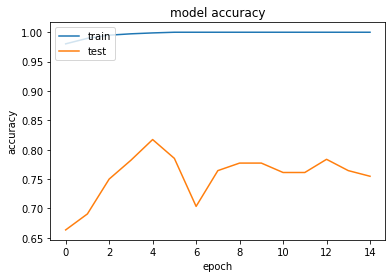

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(training_results.history['accuracy'])
plt.plot(training_results.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


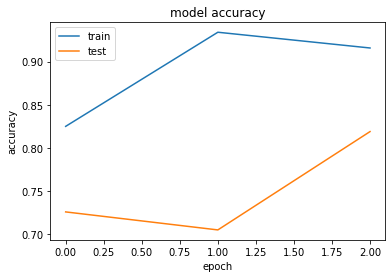

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(training_results1.history['accuracy'])
plt.plot(training_results1.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In the second model I added batch normalization and an extra layer of conv and pool. I also added early stopping because it marginally improved the accuracys (prevents overfitting). I also did a lot more epochs- 15. By the graph I should have stopped at 4 for maximum accuracy so this model does suffer from over fitting. The first model I did doesn't have a peak, which means I could probably have used that one and used a higher epoch. I did experiment with dropout layers but they made the model worse so I ended up leaving it out. They both ended up with very similar highest accuracys (81%). 